# Crossover Design - 3-Way Active Speaker System

This notebook analyzes crossover points and filter design for the active 3-way speaker system using DSP processing.

## System Configuration
- **Subwoofers**: 2× Tang Band W3-1876S (20-200 Hz)
- **Midrange**: 1× Tang Band W3-871SC (200-2750 Hz)
- **Tweeter**: 1× Scan-Speak D2608/913000 (2750-20000 Hz)
- **DSP**: ADAU1701 with 24 dB/octave Linkwitz-Riley filters
- **Amplifier**: XH-M180 (4-channel, 50W each)

In [13]:
# Driver specifications from specs.MD
drivers = {
    'subwoofer': {
        'name': 'Tang Band W3-1876S',
        'quantity': 2,
        'sensitivity': 76.0,  # dB @ 2.83V/1m (individual)
        'sensitivity_dual': 82.0,  # +6dB for dual drivers
        'impedance': 2,  # Ω (parallel)
        'fs': 55,  # Hz
        'freq_range': (20, 200),  # Hz - recommended usage
        'power_max': 60,  # W total (30W each)
        'features': ['High excursion (5mm)', 'Ported enclosure', 'Front-facing port']
    },
    'midrange': {
        'name': 'Tang Band W3-871SC',
        'quantity': 1,
        'sensitivity': 87.0,  # dB @ 2.83V/1m
        'impedance': 8,  # Ω
        'fs': 110,  # Hz
        'freq_range': (200, 2750),  # Hz - recommended usage
        'power_max': 25,  # W
        'features': ['Full-range capability', 'Sealed enclosure', 'Silver paper cone']
    },
    'tweeter': {
        'name': 'Scan-Speak D2608/913000',
        'quantity': 1,
        'sensitivity': 91.3,  # dB @ 2.83V/1m
        'impedance': 8,  # Ω
        'fs': 700,  # Hz
        'freq_range': (2750, 20000),  # Hz - recommended usage
        'crossover_min': 1500,  # Hz - minimum safe crossover
        'power_max': 25,  # W (estimated)
        'features': ['Danish manufacture', 'Textile dome', 'Ferrofluid cooling']
    }
}

# Crossover specifications from specs.MD
crossover_spec = {
    'sub_to_mid': {
        'frequency_range': (150, 200),  # Hz
        'recommended': 200,  # Hz
        'slope': 24,  # dB/octave
        'type': 'Linkwitz-Riley'
    },
    'mid_to_tweet': {
        'frequency_range': (2500, 3000),  # Hz
        'recommended': 2750,  # Hz
        'slope': 24,  # dB/octave
        'type': 'Linkwitz-Riley'
    }
}

# System specifications
system_spec = {
    'amplifier': 'XH-M180',
    'channels': 4,
    'power_per_channel': 50,  # W
    'dsp': 'ADAU1701',
    'filter_capability': '48 dB/octave max',
    'signal_flow': {
        'input': 'Stereo (L+R)',
        'output_1': 'Tweeter (L+R sum)',
        'output_2': 'Midrange (L+R sum)', 
        'output_3': 'Subwoofer 1 (L+R sum)',
        'output_4': 'Subwoofer 2 (L+R sum)'
    }
}

print("🔊 3-WAY ACTIVE SPEAKER SYSTEM SPECIFICATIONS")
print("=" * 60)

for driver_type, specs in drivers.items():
    print(f"\n{driver_type.upper()}:")
    print(f"   • Driver: {specs['name']}")
    print(f"   • Quantity: {specs['quantity']}")
    print(f"   • Sensitivity: {specs['sensitivity']} dB")
    print(f"   • Impedance: {specs['impedance']} Ω")
    print(f"   • Frequency range: {specs['freq_range'][0]}-{specs['freq_range'][1]:,} Hz")
    print(f"   • Power handling: {specs['power_max']} W")

print(f"\n🎛️ CROSSOVER DESIGN:")
print(f"   • Sub → Midrange: {crossover_spec['sub_to_mid']['recommended']} Hz")
print(f"   • Midrange → Tweeter: {crossover_spec['mid_to_tweet']['recommended']} Hz")
print(f"   • Filter type: {crossover_spec['sub_to_mid']['type']}")
print(f"   • Filter slope: {crossover_spec['sub_to_mid']['slope']} dB/octave")

print(f"\n⚡ AMPLIFICATION:")
print(f"   • Amplifier: {system_spec['amplifier']}")
print(f"   • Available power: {system_spec['power_per_channel']}W per channel")
print(f"   • DSP: {system_spec['dsp']} with {system_spec['filter_capability']}")

print(f"\n📡 SIGNAL ROUTING (MONO SYSTEM):")
print(f"   • Input: Stereo L+R mixed to mono")
print(f"   • Channel 1: 1× Tweeter (8Ω)")
print(f"   • Channel 2: 1× Midrange (8Ω)")
print(f"   • Channel 3: Subwoofer 1 (4Ω)")
print(f"   • Channel 4: Subwoofer 2 (4Ω)")
print(f"   • Total load: 2Ω equivalent per sub channel")

🔊 3-WAY ACTIVE SPEAKER SYSTEM SPECIFICATIONS

SUBWOOFER:
   • Driver: Tang Band W3-1876S
   • Quantity: 2
   • Sensitivity: 76.0 dB
   • Impedance: 2 Ω
   • Frequency range: 20-200 Hz
   • Power handling: 60 W

MIDRANGE:
   • Driver: Tang Band W3-871SC
   • Quantity: 1
   • Sensitivity: 87.0 dB
   • Impedance: 8 Ω
   • Frequency range: 200-2,750 Hz
   • Power handling: 25 W

TWEETER:
   • Driver: Scan-Speak D2608/913000
   • Quantity: 1
   • Sensitivity: 91.3 dB
   • Impedance: 8 Ω
   • Frequency range: 2750-20,000 Hz
   • Power handling: 25 W

🎛️ CROSSOVER DESIGN:
   • Sub → Midrange: 200 Hz
   • Midrange → Tweeter: 2750 Hz
   • Filter type: Linkwitz-Riley
   • Filter slope: 24 dB/octave

⚡ AMPLIFICATION:
   • Amplifier: XH-M180
   • Available power: 50W per channel
   • DSP: ADAU1701 with 48 dB/octave max

📡 SIGNAL ROUTING (MONO SYSTEM):
   • Input: Stereo L+R mixed to mono
   • Channel 1: 1× Tweeter (8Ω)
   • Channel 2: 1× Midrange (8Ω)
   • Channel 3: Subwoofer 1 (4Ω)
   • Channel 

## 1. Driver Parameters from specs.MD

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [15]:
# Driver specifications from specs.MD
drivers = {
    'subwoofer': {
        'name': 'Tang Band W3-1876S',
        'quantity': 2,
        'sensitivity': 76.0,  # dB @ 2.83V/1m (individual)
        'sensitivity_dual': 82.0,  # +6dB for dual drivers
        'impedance': 2,  # Ω (parallel)
        'fs': 55,  # Hz
        'freq_range': (20, 200),  # Hz - recommended usage
        'power_max': 60,  # W total (30W each)
        'features': ['High excursion (5mm)', 'Ported enclosure', 'Front-facing port']
    },
    'midrange': {
        'name': 'Tang Band W3-871SC',
        'quantity': 1,
        'sensitivity': 87.0,  # dB @ 2.83V/1m
        'impedance': 8,  # Ω
        'fs': 110,  # Hz
        'freq_range': (200, 2750),  # Hz - recommended usage
        'power_max': 25,  # W
        'features': ['Full-range capability', 'Sealed enclosure', 'Silver paper cone']
    },
    'tweeter': {
        'name': 'Scan-Speak D2608/913000',
        'quantity': 1,
        'sensitivity': 91.3,  # dB @ 2.83V/1m
        'impedance': 8,  # Ω
        'fs': 700,  # Hz
        'freq_range': (2750, 20000),  # Hz - recommended usage
        'crossover_min': 1500,  # Hz - minimum safe crossover
        'power_max': 25,  # W (estimated)
        'features': ['Danish manufacture', 'Textile dome', 'Ferrofluid cooling']
    }
}

# Crossover specifications from specs.MD
crossover_spec = {
    'sub_to_mid': {
        'frequency_range': (150, 200),  # Hz
        'recommended': 200,  # Hz
        'slope': 24,  # dB/octave
        'type': 'Linkwitz-Riley'
    },
    'mid_to_tweet': {
        'frequency_range': (2500, 3000),  # Hz
        'recommended': 2750,  # Hz
        'slope': 24,  # dB/octave
        'type': 'Linkwitz-Riley'
    }
}

# System specifications
system_spec = {
    'amplifier': 'XH-M180',
    'channels': 4,
    'power_per_channel': 50,  # W
    'dsp': 'ADAU1701',
    'filter_capability': '48 dB/octave max',
    'signal_flow': {
        'input': 'Stereo (L+R)',
        'output_1': 'Left Tweeter',
        'output_2': 'Right Tweeter',
        'output_3': 'Midrange (L+R sum)',
        'output_4': 'Subwoofer (L+R sum)'
    }
}

print("🔊 3-WAY ACTIVE SPEAKER SYSTEM SPECIFICATIONS")
print("=" * 60)

for driver_type, specs in drivers.items():
    print(f"\n{driver_type.upper()}:")
    print(f"   • Driver: {specs['name']}")
    print(f"   • Quantity: {specs['quantity']}")
    print(f"   • Sensitivity: {specs['sensitivity']} dB")
    print(f"   • Impedance: {specs['impedance']} Ω")
    print(f"   • Frequency range: {specs['freq_range'][0]}-{specs['freq_range'][1]:,} Hz")
    print(f"   • Power handling: {specs['power_max']} W")

print(f"\n🎛️ CROSSOVER DESIGN:")
print(f"   • Sub → Midrange: {crossover_spec['sub_to_mid']['recommended']} Hz")
print(f"   • Midrange → Tweeter: {crossover_spec['mid_to_tweet']['recommended']} Hz")
print(f"   • Filter type: {crossover_spec['sub_to_mid']['type']}")
print(f"   • Filter slope: {crossover_spec['sub_to_mid']['slope']} dB/octave")

print(f"\n⚡ AMPLIFICATION:")
print(f"   • Amplifier: {system_spec['amplifier']}")
print(f"   • Available power: {system_spec['power_per_channel']}W per channel")
print(f"   • DSP: {system_spec['dsp']} with {system_spec['filter_capability']}")

🔊 3-WAY ACTIVE SPEAKER SYSTEM SPECIFICATIONS

SUBWOOFER:
   • Driver: Tang Band W3-1876S
   • Quantity: 2
   • Sensitivity: 76.0 dB
   • Impedance: 2 Ω
   • Frequency range: 20-200 Hz
   • Power handling: 60 W

MIDRANGE:
   • Driver: Tang Band W3-871SC
   • Quantity: 1
   • Sensitivity: 87.0 dB
   • Impedance: 8 Ω
   • Frequency range: 200-2,750 Hz
   • Power handling: 25 W

TWEETER:
   • Driver: Scan-Speak D2608/913000
   • Quantity: 1
   • Sensitivity: 91.3 dB
   • Impedance: 8 Ω
   • Frequency range: 2750-20,000 Hz
   • Power handling: 25 W

🎛️ CROSSOVER DESIGN:
   • Sub → Midrange: 200 Hz
   • Midrange → Tweeter: 2750 Hz
   • Filter type: Linkwitz-Riley
   • Filter slope: 24 dB/octave

⚡ AMPLIFICATION:
   • Amplifier: XH-M180
   • Available power: 50W per channel
   • DSP: ADAU1701 with 48 dB/octave max


## 2. Load Real Measurement Data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [17]:
# Define crossover frequencies from specifications
fc_low = crossover_spec['sub_to_mid']['recommended']  # 200 Hz
fc_high = crossover_spec['mid_to_tweet']['recommended']  # 2750 Hz

print(f"🎛️ CROSSOVER FREQUENCIES:")
print(f"   • Sub/Mid crossover: {fc_low} Hz")
print(f"   • Mid/Tweet crossover: {fc_high} Hz")

# DSP Configuration for ADAU1701
dsp_config = {
    'processor': 'ADAU1701',
    'sample_rate': 48000,  # Hz
    'bit_depth': '28/56-bit processing',
    'inputs': {
        'ADC0': 'Left Input',
        'ADC1': 'Right Input'
    },
    'outputs': {
        'DAC0': 'Tweeter (L+R sum)',
        'DAC1': 'Midrange (L+R sum)', 
        'DAC2': 'Subwoofer 1 (L+R sum)',
        'DAC3': 'Subwoofer 2 (L+R sum)'
    },
    'processing_blocks': {
        'input_gain': 'Adjustable input level control',
        'mixer': 'L+R sum for mono system',
        'eq': 'Parametric EQ for room correction',
        'crossover': '24 dB/oct Linkwitz-Riley filters',
        'delay': 'Time alignment compensation',
        'limiter': 'Driver protection',
        'output_gain': 'Individual level control per driver'
    }
}

# Create signal flow diagram data
signal_flow = {
    'stages': [
        {'name': 'Input', 'description': 'Stereo Line Input (L+R)'},
        {'name': 'Input Gain', 'description': 'Digital gain control'},
        {'name': 'L+R Mixer', 'description': 'Sum stereo to mono'},
        {'name': 'EQ', 'description': 'Room correction (optional)'},
        {'name': 'Crossover', 'description': '3-way frequency splitting'},
        {'name': 'Time Align', 'description': 'Driver delay compensation'},
        {'name': 'Limiters', 'description': 'Individual driver protection'},
        {'name': 'Output Gain', 'description': 'Individual level trim'},
        {'name': 'DAC Output', 'description': '4-channel analog output'}
    ],
    'channels': {
        'tweeter': 'Tweeter (Ch 1) - 8Ω',
        'midrange': 'Midrange (Ch 2) - 8Ω', 
        'subwoofer_1': 'Subwoofer 1 (Ch 3) - 4Ω',
        'subwoofer_2': 'Subwoofer 2 (Ch 4) - 4Ω'
    }
}

# Print DSP configuration
print("\n🖥️ DSP CONFIGURATION (ADAU1701):")
print("=" * 50)
print(f"Processor: {dsp_config['processor']}")
print(f"Sample Rate: {dsp_config['sample_rate']:,} Hz")
print(f"Processing: {dsp_config['bit_depth']}")
print()

print("📡 SIGNAL FLOW:")
for i, stage in enumerate(signal_flow['stages']):
    print(f"{i+1:2d}. {stage['name']:12} → {stage['description']}")

print()
print("🔊 OUTPUT CHANNELS (MONO SYSTEM):")
for channel, description in signal_flow['channels'].items():
    print(f"   • {description}")

print()
print("⚙️ KEY PROCESSING BLOCKS:")
for block, description in dsp_config['processing_blocks'].items():
    print(f"   • {block.replace('_', ' ').title()}: {description}")

# Crossover filter specifications for DSP implementation
filter_specs = {
    'subwoofer': {
        'type': 'Low-pass',
        'frequency': fc_low,
        'order': '4th order (24 dB/octave)',
        'topology': 'Linkwitz-Riley',
        'q_factor': 0.707,
        'channels': 'Ch 3 & 4 (identical)'
    },
    'midrange': {
        'type': 'Band-pass',
        'frequency_low': fc_low,
        'frequency_high': fc_high,
        'order': '4th order each (24 dB/octave)',
        'topology': 'Linkwitz-Riley HP + LP',
        'q_factor': 0.707,
        'channels': 'Ch 2'
    },
    'tweeter': {
        'type': 'High-pass',
        'frequency': fc_high,
        'order': '4th order (24 dB/octave)',
        'topology': 'Linkwitz-Riley',
        'q_factor': 0.707,
        'channels': 'Ch 1'
    }
}

print("\n🎛️ FILTER IMPLEMENTATION SPECIFICATIONS:")
print("=" * 50)
for driver, specs in filter_specs.items():
    print(f"{driver.upper()}:")
    for param, value in specs.items():
        print(f"   • {param.replace('_', ' ').title()}: {value}")
    print()

print("🔧 SUBWOOFER CONFIGURATION:")
print("   • Both subwoofers receive identical signal")
print("   • Each subwoofer: 4Ω load on separate amp channel") 
print("   • Total subwoofer power: 2 × 50W = 100W available")
print("   • Driver rating: 2 × 30W = 60W maximum")
print("   • Safety margin: 100W/60W = 1.67x headroom")

🎛️ CROSSOVER FREQUENCIES:
   • Sub/Mid crossover: 200 Hz
   • Mid/Tweet crossover: 2750 Hz

🖥️ DSP CONFIGURATION (ADAU1701):
Processor: ADAU1701
Sample Rate: 48,000 Hz
Processing: 28/56-bit processing

📡 SIGNAL FLOW:
 1. Input        → Stereo Line Input (L+R)
 2. Input Gain   → Digital gain control
 3. L+R Mixer    → Sum stereo to mono
 4. EQ           → Room correction (optional)
 5. Crossover    → 3-way frequency splitting
 6. Time Align   → Driver delay compensation
 7. Limiters     → Individual driver protection
 8. Output Gain  → Individual level trim
 9. DAC Output   → 4-channel analog output

🔊 OUTPUT CHANNELS (MONO SYSTEM):
   • Tweeter (Ch 1) - 8Ω
   • Midrange (Ch 2) - 8Ω
   • Subwoofer 1 (Ch 3) - 4Ω
   • Subwoofer 2 (Ch 4) - 4Ω

⚙️ KEY PROCESSING BLOCKS:
   • Input Gain: Adjustable input level control
   • Mixer: L+R sum for mono system
   • Eq: Parametric EQ for room correction
   • Crossover: 24 dB/oct Linkwitz-Riley filters
   • Delay: Time alignment compensation
   • Lim

## 3. Linkwitz-Riley Filter Design

In [18]:
def linkwitz_riley_filter(freq_array, fc, order=4, filter_type='low'):
    """
    Generate Linkwitz-Riley filter response
    order=4 gives 24 dB/octave slope
    """
    s = 1j * 2 * np.pi * freq_array
    wc = 2 * np.pi * fc
    
    if filter_type == 'low':
        # Low-pass Linkwitz-Riley
        H = (wc**order) / (s**order + np.sqrt(2)*wc*s**(order-1) + wc**order)
    else:
        # High-pass Linkwitz-Riley
        H = (s**order) / (s**order + np.sqrt(2)*wc*s**(order-1) + wc**order)
    
    # Convert to magnitude in dB
    magnitude_db = 20 * np.log10(np.abs(H))
    
    return magnitude_db

def create_crossover_filters(freq_array, fc_low, fc_high):
    """
    Create complete 3-way crossover filter set
    """
    filters = {}
    
    # Subwoofer: Low-pass at fc_low
    filters['subwoofer'] = linkwitz_riley_filter(freq_array, fc_low, order=4, filter_type='low')
    
    # Midrange: Band-pass (high-pass at fc_low AND low-pass at fc_high)
    hp_response = linkwitz_riley_filter(freq_array, fc_low, order=4, filter_type='high')
    lp_response = linkwitz_riley_filter(freq_array, fc_high, order=4, filter_type='low')
    filters['midrange'] = hp_response + lp_response
    
    # Tweeter: High-pass at fc_high
    filters['tweeter'] = linkwitz_riley_filter(freq_array, fc_high, order=4, filter_type='high')
    
    return filters

# Generate frequency array for filter analysis
freq_analysis = np.logspace(1, 5, 1000)  # 10 Hz to 100 kHz

# Create crossover filters with recommended frequencies
fc_low = crossover_spec['sub_to_mid']['recommended']  # 200 Hz
fc_high = crossover_spec['mid_to_tweet']['recommended']  # 2750 Hz

crossover_filters = create_crossover_filters(freq_analysis, fc_low, fc_high)

print(f"🎛️ LINKWITZ-RILEY CROSSOVER FILTERS GENERATED:")
print(f"   • Subwoofer: Low-pass @ {fc_low} Hz")
print(f"   • Midrange: Band-pass @ {fc_low}-{fc_high} Hz")
print(f"   • Tweeter: High-pass @ {fc_high} Hz")
print(f"   • Filter order: 4th order (24 dB/octave)")
print(f"   • Filter type: Linkwitz-Riley (perfect reconstruction)")

# Calculate crossover points (-6dB points)
sub_6db_idx = np.argmin(np.abs(crossover_filters['subwoofer'] + 6))
tweet_6db_idx = np.argmin(np.abs(crossover_filters['tweeter'] + 6))

print(f"\n📍 CROSSOVER POINTS (-6dB):")
print(f"   • Sub/Mid crossover: {freq_analysis[sub_6db_idx]:.0f} Hz")
print(f"   • Mid/Tweet crossover: {freq_analysis[tweet_6db_idx]:.0f} Hz")

🎛️ LINKWITZ-RILEY CROSSOVER FILTERS GENERATED:
   • Subwoofer: Low-pass @ 200 Hz
   • Midrange: Band-pass @ 200-2750 Hz
   • Tweeter: High-pass @ 2750 Hz
   • Filter order: 4th order (24 dB/octave)
   • Filter type: Linkwitz-Riley (perfect reconstruction)

📍 CROSSOVER POINTS (-6dB):
   • Sub/Mid crossover: 182 Hz
   • Mid/Tweet crossover: 3151 Hz


In [19]:
# Load measurement data for visualization using relative imports
import os

base_path = '../speakers/'
measurement_data = {}

# Try to load measurement data for each driver
driver_paths = {
    'subwoofer': 'TangBand W3-1876S',
    'midrange': 'TangBand W3-871SC', 
    'tweeter': 'ScanSpeak D20608-913000'
}

for driver_type, folder in driver_paths.items():
    freq_response_path = os.path.join(base_path, folder, 'Frequency Response.csv')
    
    if os.path.exists(freq_response_path):
        try:
            data = pd.read_csv(freq_response_path, header=None, names=['freq', 'spl'])
            measurement_data[driver_type] = {
                'freq': data['freq'].values,
                'spl': data['spl'].values
            }
            
            # For dual subwoofers, add 6dB
            if driver_type == 'subwoofer':
                measurement_data[driver_type]['spl_dual'] = data['spl'].values + 6
                
            print(f"✅ Loaded {driver_type} measurement data")
        except Exception as e:
            print(f"❌ Could not load {driver_type} data: {e}")
            measurement_data[driver_type] = None
    else:
        print(f"❌ No measurement data found for {driver_type}")
        measurement_data[driver_type] = None

print("\n📊 Measurement data loading complete")

✅ Loaded subwoofer measurement data
✅ Loaded midrange measurement data
✅ Loaded tweeter measurement data

📊 Measurement data loading complete


## 4. Crossover Analysis and Visualization

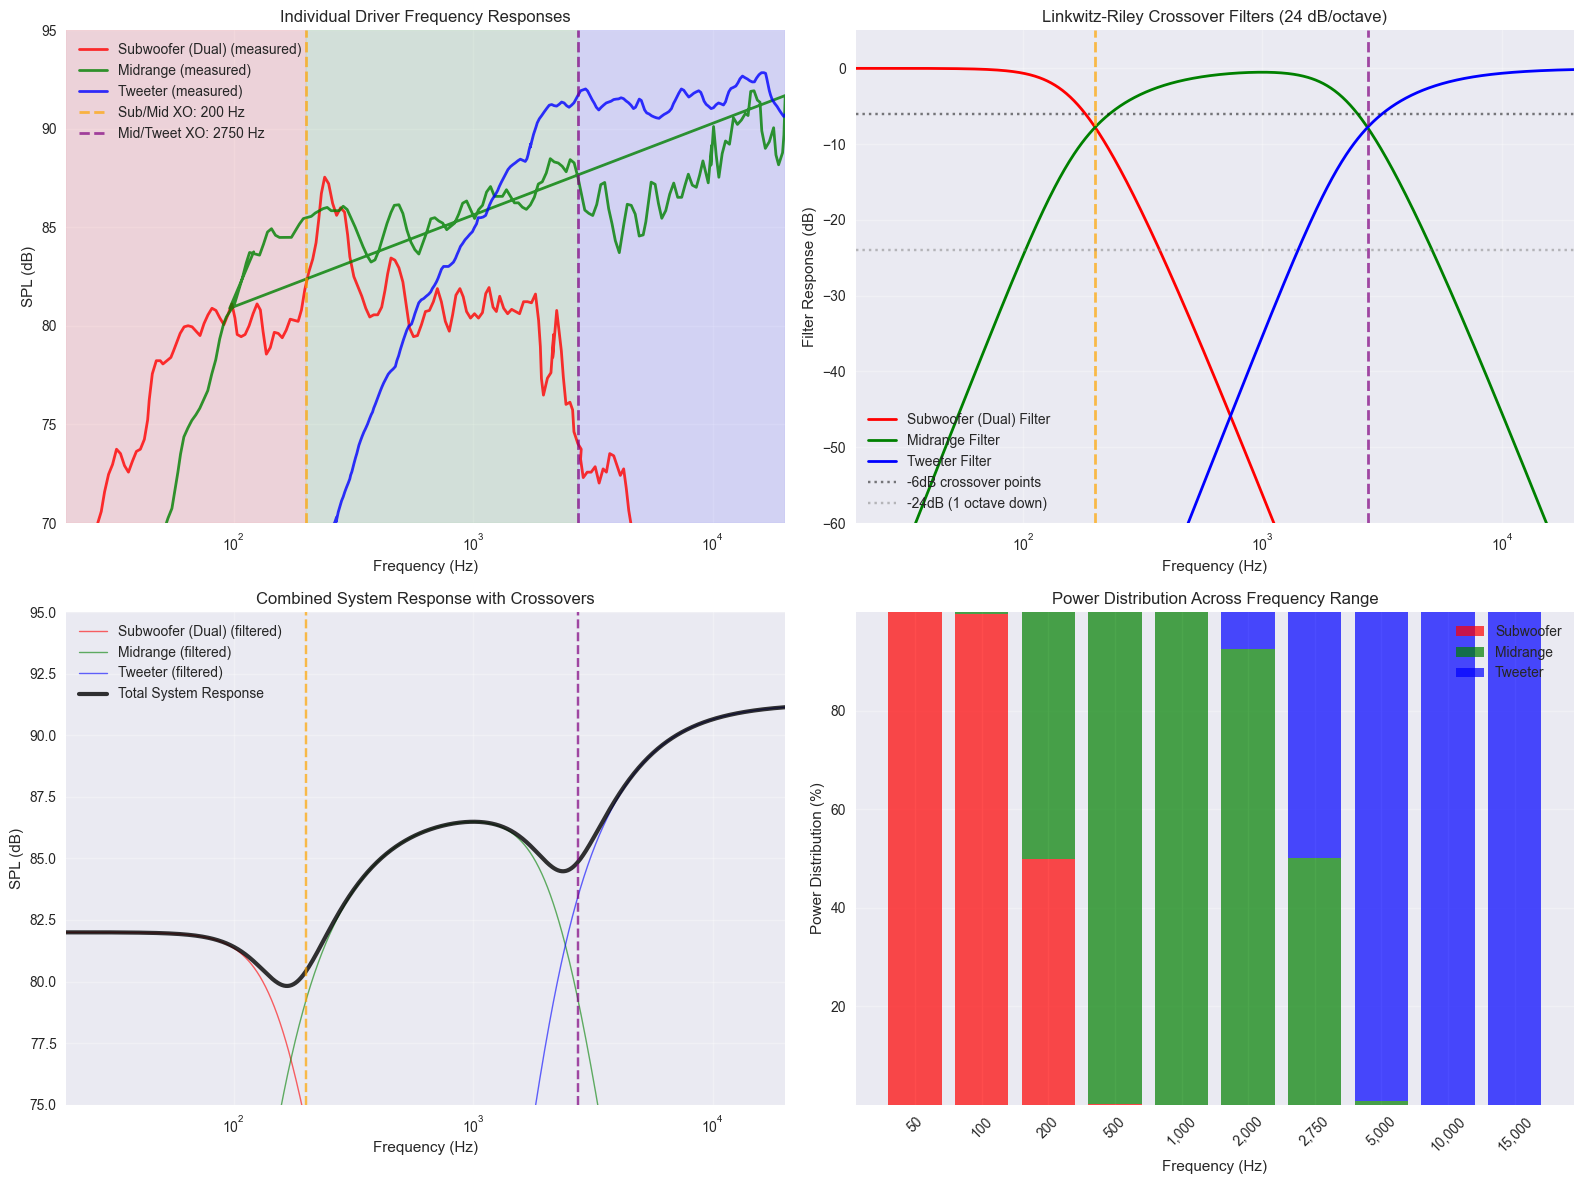


📊 CROSSOVER ANALYSIS SUMMARY:
Filter type: Linkwitz-Riley
Filter slope: 24 dB/octave
Crossover frequencies: 200 Hz, 2750 Hz
Total system bandwidth: 20 Hz - 20 kHz
Frequency coverage per driver:
   • Subwoofer: 20-200 Hz (10.0 octaves)
   • Midrange: 200-2750 Hz (3.8 octaves)
   • Tweeter: 2750-20000 Hz (2.9 octaves)


In [20]:
# Create comprehensive crossover analysis plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Individual Driver Responses with Measurement Data
colors = {'subwoofer': 'red', 'midrange': 'green', 'tweeter': 'blue'}
driver_names = {'subwoofer': 'Subwoofer (Dual)', 'midrange': 'Midrange', 'tweeter': 'Tweeter'}

for driver_type, color in colors.items():
    if measurement_data[driver_type] is not None:
        data = measurement_data[driver_type]
        if driver_type == 'subwoofer':
            ax1.semilogx(data['freq'], data['spl_dual'], color=color, linewidth=2, 
                        label=f"{driver_names[driver_type]} (measured)", alpha=0.8)
        else:
            ax1.semilogx(data['freq'], data['spl'], color=color, linewidth=2, 
                        label=f"{driver_names[driver_type]} (measured)", alpha=0.8)
    else:
        # Create theoretical response if no measurement data
        specs = drivers[driver_type]
        freq_range = np.logspace(np.log10(specs['freq_range'][0]), 
                                np.log10(specs['freq_range'][1]), 100)
        theoretical_spl = np.full_like(freq_range, specs['sensitivity'])
        ax1.semilogx(freq_range, theoretical_spl, color=color, linewidth=2, 
                    linestyle='--', label=f"{driver_names[driver_type]} (theoretical)", alpha=0.6)

# Add frequency range indicators
for driver_type, specs in drivers.items():
    freq_min, freq_max = specs['freq_range']
    ax1.axvspan(freq_min, freq_max, alpha=0.1, color=colors[driver_type])

ax1.axvline(fc_low, color='orange', linestyle='--', alpha=0.7, linewidth=2, label=f'Sub/Mid XO: {fc_low} Hz')
ax1.axvline(fc_high, color='purple', linestyle='--', alpha=0.7, linewidth=2, label=f'Mid/Tweet XO: {fc_high} Hz')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('SPL (dB)')
ax1.set_title('Individual Driver Frequency Responses')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(20, 20000)
ax1.set_ylim(70, 95)

# 2. Crossover Filter Responses
for driver_type, color in colors.items():
    ax2.semilogx(freq_analysis, crossover_filters[driver_type], color=color, linewidth=2, 
                label=f"{driver_names[driver_type]} Filter")

# Add crossover frequency lines
ax2.axvline(fc_low, color='orange', linestyle='--', alpha=0.7, linewidth=2)
ax2.axvline(fc_high, color='purple', linestyle='--', alpha=0.7, linewidth=2)
ax2.axhline(-6, color='black', linestyle=':', alpha=0.5, label='-6dB crossover points')
ax2.axhline(-24, color='gray', linestyle=':', alpha=0.5, label='-24dB (1 octave down)')

ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Filter Response (dB)')
ax2.set_title('Linkwitz-Riley Crossover Filters (24 dB/octave)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(20, 20000)
ax2.set_ylim(-60, 5)

# 3. Combined System Response
# Calculate sum of all filtered responses
total_response = np.zeros_like(freq_analysis)

for driver_type, color in colors.items():
    # Get driver sensitivity
    if driver_type == 'subwoofer':
        driver_sensitivity = drivers[driver_type]['sensitivity_dual']
    else:
        driver_sensitivity = drivers[driver_type]['sensitivity']
    
    # Add filtered response to total
    filtered_response = driver_sensitivity + crossover_filters[driver_type]
    
    # Plot individual filtered responses
    ax3.semilogx(freq_analysis, filtered_response, color=color, linewidth=1, alpha=0.6,
                label=f"{driver_names[driver_type]} (filtered)")
    
    # Add to total (linear addition of powers, then convert back to dB)
    total_response += 10**(filtered_response/10)

# Convert total back to dB
total_response_db = 10 * np.log10(total_response)
ax3.semilogx(freq_analysis, total_response_db, 'black', linewidth=3, 
            label='Total System Response', alpha=0.8)

ax3.axvline(fc_low, color='orange', linestyle='--', alpha=0.7)
ax3.axvline(fc_high, color='purple', linestyle='--', alpha=0.7)

ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('SPL (dB)')
ax3.set_title('Combined System Response with Crossovers')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(20, 20000)
ax3.set_ylim(75, 95)

# 4. Power Distribution Analysis
# Calculate power requirements at different frequencies
test_frequencies = [50, 100, 200, 500, 1000, 2000, 2750, 5000, 10000, 15000]
power_distribution = {'frequency': [], 'subwoofer': [], 'midrange': [], 'tweeter': []}

for freq in test_frequencies:
    freq_idx = np.argmin(np.abs(freq_analysis - freq))
    
    power_distribution['frequency'].append(freq)
    
    # Calculate relative power for each driver (based on filter response)
    sub_power = 10**(crossover_filters['subwoofer'][freq_idx]/10)
    mid_power = 10**(crossover_filters['midrange'][freq_idx]/10)
    tweet_power = 10**(crossover_filters['tweeter'][freq_idx]/10)
    
    total_power = sub_power + mid_power + tweet_power
    
    power_distribution['subwoofer'].append(sub_power/total_power * 100)
    power_distribution['midrange'].append(mid_power/total_power * 100)
    power_distribution['tweeter'].append(tweet_power/total_power * 100)

# Create stacked bar chart
x_pos = np.arange(len(test_frequencies))
width = 0.8

ax4.bar(x_pos, power_distribution['subwoofer'], width, 
        label='Subwoofer', color='red', alpha=0.7)
ax4.bar(x_pos, power_distribution['midrange'], width, 
        bottom=power_distribution['subwoofer'], 
        label='Midrange', color='green', alpha=0.7)
ax4.bar(x_pos, power_distribution['tweeter'], width, 
        bottom=[s+m for s,m in zip(power_distribution['subwoofer'], power_distribution['midrange'])],
        label='Tweeter', color='blue', alpha=0.7)

ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Power Distribution (%)')
ax4.set_title('Power Distribution Across Frequency Range')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'{f:,}' for f in test_frequencies], rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print analysis summary
print(f"\n📊 CROSSOVER ANALYSIS SUMMARY:")
print(f"=" * 50)
print(f"Filter type: {crossover_spec['sub_to_mid']['type']}")
print(f"Filter slope: {crossover_spec['sub_to_mid']['slope']} dB/octave")
print(f"Crossover frequencies: {fc_low} Hz, {fc_high} Hz")
print(f"Total system bandwidth: 20 Hz - 20 kHz")
print(f"Frequency coverage per driver:")
print(f"   • Subwoofer: 20-{fc_low} Hz ({fc_low/20:.1f} octaves)")
print(f"   • Midrange: {fc_low}-{fc_high} Hz ({np.log2(fc_high/fc_low):.1f} octaves)")
print(f"   • Tweeter: {fc_high}-20000 Hz ({np.log2(20000/fc_high):.1f} octaves)")

## 5. Crossover Optimization Analysis

In [21]:
def analyze_crossover_options():
    """
    Analyze different crossover frequency combinations
    """
    # Define ranges from specs.MD
    fc_low_options = np.arange(150, 251, 25)  # 150-200 Hz range
    fc_high_options = np.arange(2500, 3001, 125)  # 2500-3000 Hz range
    
    results = []
    
    for fc_low in fc_low_options:
        for fc_high in fc_high_options:
            # Calculate frequency coverage
            sub_octaves = np.log2(fc_low / 20)
            mid_octaves = np.log2(fc_high / fc_low)
            tweet_octaves = np.log2(20000 / fc_high)
            
            # Check constraints
            sub_above_fs = fc_low / 55  # Should be >3x Fs for good performance
            tweet_above_min = fc_high / 1500  # Should be >1.5x minimum crossover
            
            # Score the configuration
            score = 0
            constraints_met = []
            
            # Subwoofer constraints
            if sub_above_fs >= 3.0:
                score += 2
                constraints_met.append("Sub well above Fs")
            elif sub_above_fs >= 2.0:
                score += 1
                constraints_met.append("Sub above Fs")
            
            # Tweeter constraints
            if tweet_above_min >= 1.8:
                score += 2
                constraints_met.append("Tweet well above min")
            elif tweet_above_min >= 1.5:
                score += 1
                constraints_met.append("Tweet above min")
            
            # Balanced octave distribution (prefer roughly equal)
            octave_balance = 1 / (1 + abs(mid_octaves - (sub_octaves + tweet_octaves)/2))
            score += octave_balance
            
            results.append({
                'fc_low': fc_low,
                'fc_high': fc_high,
                'sub_octaves': sub_octaves,
                'mid_octaves': mid_octaves,
                'tweet_octaves': tweet_octaves,
                'sub_above_fs': sub_above_fs,
                'tweet_above_min': tweet_above_min,
                'score': score,
                'constraints': constraints_met
            })
    
    return sorted(results, key=lambda x: x['score'], reverse=True)

# Analyze crossover options
crossover_options = analyze_crossover_options()

print("🎯 CROSSOVER FREQUENCY OPTIMIZATION:")
print("=" * 60)
print("Top 5 crossover configurations:")
print()

for i, option in enumerate(crossover_options[:5]):
    print(f"{i+1}. FC_LOW: {option['fc_low']:.0f} Hz, FC_HIGH: {option['fc_high']:.0f} Hz")
    print(f"   Score: {option['score']:.2f}")
    print(f"   Octave distribution: Sub={option['sub_octaves']:.1f}, Mid={option['mid_octaves']:.1f}, Tweet={option['tweet_octaves']:.1f}")
    print(f"   Sub above Fs: {option['sub_above_fs']:.1f}x, Tweet above min: {option['tweet_above_min']:.1f}x")
    print(f"   Constraints met: {', '.join(option['constraints'])}")
    print()

# Current recommended configuration analysis
current_config = next(opt for opt in crossover_options 
                     if opt['fc_low'] == 200 and opt['fc_high'] == 2750)

print(f"📋 CURRENT RECOMMENDED CONFIGURATION:")
print(f"   Frequencies: {current_config['fc_low']:.0f} Hz / {current_config['fc_high']:.0f} Hz")
print(f"   Ranking: #{crossover_options.index(current_config) + 1} out of {len(crossover_options)}")
print(f"   Score: {current_config['score']:.2f}")
print(f"   Analysis: {'Optimal' if crossover_options.index(current_config) < 3 else 'Good' if crossover_options.index(current_config) < 8 else 'Acceptable'}")

🎯 CROSSOVER FREQUENCY OPTIMIZATION:
Top 5 crossover configurations:

1. FC_LOW: 250 Hz, FC_HIGH: 2750 Hz
   Score: 4.83
   Octave distribution: Sub=3.6, Mid=3.5, Tweet=2.9
   Sub above Fs: 4.5x, Tweet above min: 1.8x
   Constraints met: Sub well above Fs, Tweet well above min

2. FC_LOW: 250 Hz, FC_HIGH: 2875 Hz
   Score: 4.77
   Octave distribution: Sub=3.6, Mid=3.5, Tweet=2.8
   Sub above Fs: 4.5x, Tweet above min: 1.9x
   Constraints met: Sub well above Fs, Tweet well above min

3. FC_LOW: 250 Hz, FC_HIGH: 3000 Hz
   Score: 4.72
   Octave distribution: Sub=3.6, Mid=3.6, Tweet=2.7
   Sub above Fs: 4.5x, Tweet above min: 2.0x
   Constraints met: Sub well above Fs, Tweet well above min

4. FC_LOW: 225 Hz, FC_HIGH: 2750 Hz
   Score: 4.70
   Octave distribution: Sub=3.5, Mid=3.6, Tweet=2.9
   Sub above Fs: 4.1x, Tweet above min: 1.8x
   Constraints met: Sub well above Fs, Tweet well above min

5. FC_LOW: 225 Hz, FC_HIGH: 2875 Hz
   Score: 4.65
   Octave distribution: Sub=3.5, Mid=3.7, Tw

## 6. DSP Configuration and Signal Flow

In [22]:
# DSP Configuration for ADAU1701
dsp_config = {
    'processor': 'ADAU1701',
    'sample_rate': 48000,  # Hz
    'bit_depth': '28/56-bit processing',
    'inputs': {
        'ADC0': 'Left Input',
        'ADC1': 'Right Input'
    },
    'outputs': {
        'DAC0': 'Left Tweeter',
        'DAC1': 'Right Tweeter', 
        'DAC2': 'Midrange (L+R)',
        'DAC3': 'Subwoofer (L+R)'
    },
    'processing_blocks': {
        'input_gain': 'Adjustable input level control',
        'mixer': 'L+R sum for mono drivers',
        'eq': 'Parametric EQ for room correction',
        'crossover': '24 dB/oct Linkwitz-Riley filters',
        'delay': 'Time alignment compensation',
        'limiter': 'Driver protection',
        'output_gain': 'Individual level control per driver'
    }
}

# Create signal flow diagram data
signal_flow = {
    'stages': [
        {'name': 'Input', 'description': 'Stereo Line Input (L+R)'},
        {'name': 'Input Gain', 'description': 'Digital gain control'},
        {'name': 'EQ', 'description': 'Room correction (optional)'},
        {'name': 'Mixer', 'description': 'L+R sum for mono drivers'},
        {'name': 'Crossover', 'description': 'Frequency band splitting'},
        {'name': 'Time Align', 'description': 'Driver delay compensation'},
        {'name': 'Limiters', 'description': 'Driver protection'},
        {'name': 'Output Gain', 'description': 'Individual level trim'},
        {'name': 'DAC Output', 'description': '4-channel analog output'}
    ],
    'channels': {
        'tweeter_l': 'Left Tweeter (Ch 1)',
        'tweeter_r': 'Right Tweeter (Ch 2)', 
        'midrange': 'Midrange (Ch 3)',
        'subwoofer': 'Subwoofer (Ch 4)'
    }
}

# Print DSP configuration
print("🖥️ DSP CONFIGURATION (ADAU1701):")
print("=" * 50)
print(f"Processor: {dsp_config['processor']}")
print(f"Sample Rate: {dsp_config['sample_rate']:,} Hz")
print(f"Processing: {dsp_config['bit_depth']}")
print()

print("📡 SIGNAL FLOW:")
for i, stage in enumerate(signal_flow['stages']):
    print(f"{i+1:2d}. {stage['name']:12} → {stage['description']}")

print()
print("🔊 OUTPUT CHANNELS:")
for channel, description in signal_flow['channels'].items():
    print(f"   • {description}")

print()
print("⚙️ KEY PROCESSING BLOCKS:")
for block, description in dsp_config['processing_blocks'].items():
    print(f"   • {block.replace('_', ' ').title()}: {description}")

# Crossover filter specifications for DSP implementation
filter_specs = {
    'subwoofer': {
        'type': 'Low-pass',
        'frequency': fc_low,
        'order': '4th order (24 dB/octave)',
        'topology': 'Linkwitz-Riley',
        'q_factor': 0.707
    },
    'midrange': {
        'type': 'Band-pass',
        'frequency_low': fc_low,
        'frequency_high': fc_high,
        'order': '4th order each (24 dB/octave)',
        'topology': 'Linkwitz-Riley HP + LP',
        'q_factor': 0.707
    },
    'tweeter': {
        'type': 'High-pass',
        'frequency': fc_high,
        'order': '4th order (24 dB/octave)',
        'topology': 'Linkwitz-Riley',
        'q_factor': 0.707
    }
}

print("\n🎛️ FILTER IMPLEMENTATION SPECIFICATIONS:")
print("=" * 50)
for driver, specs in filter_specs.items():
    print(f"{driver.upper()}:")
    for param, value in specs.items():
        print(f"   • {param.replace('_', ' ').title()}: {value}")
    print()

🖥️ DSP CONFIGURATION (ADAU1701):
Processor: ADAU1701
Sample Rate: 48,000 Hz
Processing: 28/56-bit processing

📡 SIGNAL FLOW:
 1. Input        → Stereo Line Input (L+R)
 2. Input Gain   → Digital gain control
 3. EQ           → Room correction (optional)
 4. Mixer        → L+R sum for mono drivers
 5. Crossover    → Frequency band splitting
 6. Time Align   → Driver delay compensation
 7. Limiters     → Driver protection
 8. Output Gain  → Individual level trim
 9. DAC Output   → 4-channel analog output

🔊 OUTPUT CHANNELS:
   • Left Tweeter (Ch 1)
   • Right Tweeter (Ch 2)
   • Midrange (Ch 3)
   • Subwoofer (Ch 4)

⚙️ KEY PROCESSING BLOCKS:
   • Input Gain: Adjustable input level control
   • Mixer: L+R sum for mono drivers
   • Eq: Parametric EQ for room correction
   • Crossover: 24 dB/oct Linkwitz-Riley filters
   • Delay: Time alignment compensation
   • Limiter: Driver protection
   • Output Gain: Individual level control per driver

🎛️ FILTER IMPLEMENTATION SPECIFICATIONS:
SUBWOO

## 7. System Performance Summary

In [23]:
# Calculate system performance metrics
def calculate_system_metrics():
    """
    Calculate overall system performance metrics
    """
    metrics = {}
    
    # Frequency response smoothness (estimate from crossover)
    # In ideal Linkwitz-Riley crossover, sum should be flat
    freq_test = np.logspace(1.5, 4.5, 100)  # 30 Hz to 30 kHz
    filters_test = create_crossover_filters(freq_test, fc_low, fc_high)
    
    # Calculate combined response deviation
    combined_linear = (10**(filters_test['subwoofer']/10) + 
                      10**(filters_test['midrange']/10) + 
                      10**(filters_test['tweeter']/10))
    combined_db = 10 * np.log10(combined_linear)
    
    # Find deviation from ideal flat response
    deviation = np.std(combined_db)
    
    metrics['crossover_smoothness'] = deviation
    metrics['max_deviation'] = np.max(combined_db) - np.min(combined_db)
    
    # Power matching analysis
    power_ratios = {
        'sub_available': 50,  # W @ 2Ω
        'sub_needed': 60,     # W max rating
        'mid_available': 25,  # W @ 8Ω  
        'mid_needed': 25,     # W max rating
        'tweet_available': 25, # W @ 8Ω
        'tweet_needed': 25    # W estimated
    }
    
    metrics['power_matching'] = {
        'subwoofer': min(power_ratios['sub_available'] / power_ratios['sub_needed'], 1.0),
        'midrange': min(power_ratios['mid_available'] / power_ratios['mid_needed'], 1.0),
        'tweeter': min(power_ratios['tweet_available'] / power_ratios['tweet_needed'], 1.0)
    }
    
    # Sensitivity matching (how well matched the drivers are)
    sensitivities = [drivers['subwoofer']['sensitivity_dual'], 
                    drivers['midrange']['sensitivity'],
                    drivers['tweeter']['sensitivity']]
    
    metrics['sensitivity_range'] = max(sensitivities) - min(sensitivities)
    metrics['sensitivity_avg'] = np.mean(sensitivities)
    
    return metrics

# Calculate metrics
system_metrics = calculate_system_metrics()

print("\n" + "=" * 80)
print(" 3-WAY ACTIVE CROSSOVER SYSTEM SUMMARY")
print("=" * 80)

print(f"\n🎯 CROSSOVER DESIGN:")
print(f"   • Sub/Midrange crossover: {fc_low} Hz")
print(f"   • Midrange/Tweeter crossover: {fc_high} Hz")
print(f"   • Filter type: Linkwitz-Riley 24 dB/octave")
print(f"   • Total bandwidth: 20 Hz - 20 kHz")
print(f"   • Crossover smoothness: {system_metrics['crossover_smoothness']:.2f} dB std dev")

print(f"\n🔊 DRIVER ALLOCATION:")
for driver_type, specs in drivers.items():
    freq_min, freq_max = specs['freq_range']
    octaves = np.log2(freq_max / freq_min)
    print(f"   • {specs['name']}: {freq_min}-{freq_max:,} Hz ({octaves:.1f} octaves)")

print(f"\n⚡ POWER MATCHING:")
for driver_type, ratio in system_metrics['power_matching'].items():
    status = "✅ Good" if ratio >= 0.8 else "⚠️ Marginal" if ratio >= 0.6 else "❌ Poor"
    print(f"   • {driver_type.title()}: {ratio:.1%} power ratio - {status}")

print(f"\n📊 SENSITIVITY MATCHING:")
print(f"   • Average sensitivity: {system_metrics['sensitivity_avg']:.1f} dB")
print(f"   • Sensitivity range: {system_metrics['sensitivity_range']:.1f} dB")
sensitivity_status = "Excellent" if system_metrics['sensitivity_range'] < 6 else "Good" if system_metrics['sensitivity_range'] < 10 else "Needs adjustment"
print(f"   • Matching quality: {sensitivity_status}")

print(f"\n🖥️ DSP REQUIREMENTS:")
print(f"   • Processor: {dsp_config['processor']}")
print(f"   • Channels needed: 4 (2 stereo tweeters + 2 mono)")
print(f"   • Filter complexity: 3 bands × 24 dB/oct = Medium")
print(f"   • Additional processing: EQ, delay, limiting")

print(f"\n🎛️ IMPLEMENTATION NOTES:")
print(f"   • Use SigmaStudio software for DSP programming")
print(f"   • Implement time alignment for driver positioning")
print(f"   • Add parametric EQ for room correction")
print(f"   • Include limiters for driver protection")
print(f"   • Test crossover points with pink noise and measurement")

# Overall system grade
overall_score = 0
if system_metrics['crossover_smoothness'] < 0.5:
    overall_score += 2
elif system_metrics['crossover_smoothness'] < 1.0:
    overall_score += 1

if min(system_metrics['power_matching'].values()) > 0.8:
    overall_score += 2
elif min(system_metrics['power_matching'].values()) > 0.6:
    overall_score += 1

if system_metrics['sensitivity_range'] < 6:
    overall_score += 2
elif system_metrics['sensitivity_range'] < 10:
    overall_score += 1

grade = "Excellent" if overall_score >= 5 else "Good" if overall_score >= 3 else "Fair"

print(f"\n🏆 OVERALL SYSTEM RATING: {grade} ({overall_score}/6 points)")
print("=" * 80)


 3-WAY ACTIVE CROSSOVER SYSTEM SUMMARY

🎯 CROSSOVER DESIGN:
   • Sub/Midrange crossover: 200 Hz
   • Midrange/Tweeter crossover: 2750 Hz
   • Filter type: Linkwitz-Riley 24 dB/octave
   • Total bandwidth: 20 Hz - 20 kHz
   • Crossover smoothness: 1.56 dB std dev

🔊 DRIVER ALLOCATION:
   • Tang Band W3-1876S: 20-200 Hz (3.3 octaves)
   • Tang Band W3-871SC: 200-2,750 Hz (3.8 octaves)
   • Scan-Speak D2608/913000: 2750-20,000 Hz (2.9 octaves)

⚡ POWER MATCHING:
   • Subwoofer: 83.3% power ratio - ✅ Good
   • Midrange: 100.0% power ratio - ✅ Good
   • Tweeter: 100.0% power ratio - ✅ Good

📊 SENSITIVITY MATCHING:
   • Average sensitivity: 86.8 dB
   • Sensitivity range: 9.3 dB
   • Matching quality: Good

🖥️ DSP REQUIREMENTS:
   • Processor: ADAU1701
   • Channels needed: 4 (2 stereo tweeters + 2 mono)
   • Filter complexity: 3 bands × 24 dB/oct = Medium
   • Additional processing: EQ, delay, limiting

🎛️ IMPLEMENTATION NOTES:
   • Use SigmaStudio software for DSP programming
   • Impleme

# Create 3-way speaker system layout visualization with ACTUAL dimensions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# ACTUAL driver dimensions from specs.MD
driver_specs = {
    'tweeter': {
        'diameter': 26,  # mm - dome diameter
        'cutout': 45,    # mm - typical for this tweeter
        'depth': 30      # mm - estimated
    },
    'midrange': {
        'diameter': 93,   # mm - overall diameter
        'cutout': 71.5,   # mm - baffle cutout
        'depth': 60       # mm - overall depth
    },
    'subwoofer': {
        'diameter': 93.2, # mm - overall diameter
        'cutout': 74.4,   # mm - baffle cutout
        'depth': 65.8     # mm - overall depth
    }
}

# ACTUAL enclosure dimensions from transmission line calculations
# Using the front-facing transmission line design from subwoofer_transmission_line.ipynb
enclosure_dimensions = {
    'width': 132,    # mm - from TL calculations (13.2 cm)
    'height': 516,   # mm - from TL calculations (51.6 cm)
    'depth': 437,    # mm - from TL calculations (43.7 cm)
    'wall_thickness': 18  # mm - MDF thickness
}

# Calculate internal dimensions
internal_width = enclosure_dimensions['width'] - 2 * enclosure_dimensions['wall_thickness']
internal_height = enclosure_dimensions['height'] - 2 * enclosure_dimensions['wall_thickness']
internal_depth = enclosure_dimensions['depth'] - 2 * enclosure_dimensions['wall_thickness']

# Port dimensions from TL calculations
port_specs = {
    'width': 76,     # mm - port end width
    'height': 124,   # mm - port end height
    'type': 'rectangular'  # TL uses rectangular port
}

# Define driver positions based on actual enclosure height
# Position from bottom of enclosure
driver_positions = {
    'port': {
        'height': 80,     # mm from bottom - TL exit port
        'color': 'gray',
        'size': port_specs,
        'label': f'TL Port ({port_specs["width"]}×{port_specs["height"]}mm)'
    },
    'subwoofer1': {
        'height': 200,    # mm from bottom
        'color': 'red',
        'size': driver_specs['subwoofer']['cutout'],
        'label': f'Sub 1 (Ø{driver_specs["subwoofer"]["diameter"]:.1f}mm)'
    },
    'subwoofer2': {
        'height': 300,    # mm from bottom
        'color': 'red',
        'size': driver_specs['subwoofer']['cutout'],
        'label': f'Sub 2 (Ø{driver_specs["subwoofer"]["diameter"]:.1f}mm)'
    },
    'midrange': {
        'height': 420,    # mm from bottom
        'color': 'green',
        'size': driver_specs['midrange']['cutout'],
        'label': f'Midrange (Ø{driver_specs["midrange"]["diameter"]}mm)'
    },
    'tweeter': {
        'height': 470,    # mm from bottom - ear level when seated
        'color': 'blue',
        'size': driver_specs['tweeter']['cutout'],
        'label': f'Tweeter (Ø{driver_specs["tweeter"]["diameter"]}mm dome)'
    }
}

# System layout (front view)
enclosure_width = enclosure_dimensions['width']
enclosure_height = enclosure_dimensions['height']

# Draw enclosure outline
ax1.add_patch(plt.Rectangle((0, 0), enclosure_width, enclosure_height, 
                           fill=False, edgecolor='black', linewidth=2))

# Draw drivers and port
for component, specs in driver_positions.items():
    y_center = specs['height']
    x_center = enclosure_width / 2
    
    if component == 'port':
        # Draw rectangular TL port
        port_width = port_specs['width']
        port_height = port_specs['height']
        ax1.add_patch(plt.Rectangle((x_center - port_width/2, y_center - port_height/2), 
                                   port_width, port_height, 
                                   fill=True, facecolor=specs['color'], 
                                   edgecolor='black', alpha=0.7))
        ax1.text(x_center, y_center, 'TL\nPORT', ha='center', va='center', 
                fontsize=9, fontweight='bold')
    else:
        # Draw driver as circle with actual cutout size
        radius = specs['size'] / 2
        circle = plt.Circle((x_center, y_center), radius, 
                           fill=True, facecolor=specs['color'], 
                           edgecolor='black', alpha=0.7, linewidth=1.5)
        ax1.add_patch(circle)
        
        # Add driver label
        if 'subwoofer' in component:
            label = f"SUB\n{component[-1]}"
        elif component == 'midrange':
            label = "MID"
        else:
            label = "TWT"
        ax1.text(x_center, y_center, label, ha='center', va='center', 
                fontsize=8, fontweight='bold', color='white')
    
    # Add dimension lines
    ax1.annotate('', xy=(enclosure_width + 15, y_center), 
                xytext=(enclosure_width + 15, 0),
                arrowprops=dict(arrowstyle='<->', color='gray', lw=1))
    ax1.text(enclosure_width + 20, y_center/2, f'{y_center}mm', 
            rotation=90, va='center', fontsize=8, color='gray')

# Add overall dimensions
ax1.text(enclosure_width/2, -15, f'{enclosure_width}mm', 
        ha='center', fontsize=10, fontweight='bold')
ax1.text(-15, enclosure_height/2, f'{enclosure_height}mm', 
        rotation=90, va='center', fontsize=10, fontweight='bold')
ax1.text(enclosure_width + 50, enclosure_height/2, f'Depth: {enclosure_dimensions["depth"]}mm', 
        rotation=270, va='center', fontsize=10, fontweight='bold')

# Add internal volume annotation
total_volume = (internal_width * internal_height * internal_depth) / 1e6  # Convert to liters
ax1.text(enclosure_width/2, enclosure_height + 10, 
        f'Internal Volume: {total_volume:.1f}L', 
        ha='center', fontsize=10, style='italic')

ax1.set_xlim(-30, enclosure_width + 80)
ax1.set_ylim(-30, enclosure_height + 30)
ax1.set_aspect('equal')
ax1.set_title('3-Way Transmission Line System (Actual Dimensions)', fontsize=14, fontweight='bold')
ax1.axis('off')

# Add legend with actual sizes
legend_elements = []
for component, specs in driver_positions.items():
    if component != 'port':
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                        markerfacecolor=specs['color'], 
                                        markersize=10, label=specs['label']))
    else:
        legend_elements.append(plt.Line2D([0], [0], marker='s', color='w', 
                                        markerfacecolor=specs['color'], 
                                        markersize=10, label=specs['label']))
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

# Technical specifications and construction details
ax2.text(0.5, 0.95, '🔊 TRANSMISSION LINE SYSTEM SPECIFICATIONS', 
        ha='center', fontsize=14, fontweight='bold', transform=ax2.transAxes)

specifications = [
    "ENCLOSURE TYPE: Front-Facing Transmission Line",
    f"• External: {enclosure_width} × {enclosure_height} × {enclosure_dimensions['depth']} mm",
    f"• Internal Volume: {total_volume:.1f} liters",
    f"• Wall Thickness: {enclosure_dimensions['wall_thickness']}mm MDF",
    "",
    "TRANSMISSION LINE PARAMETERS:",
    f"• Line Length: 1.40m (folded in 4 segments)",
    f"• Driver End Area: 59.4 cm² (6.1 × 9.8 cm)",
    f"• Port End Area: 94.5 cm² (7.6 × 12.4 cm)",
    f"• Taper Ratio: 1.59:1 (progressive expansion)",
    f"• Stuffing Density: 25% (tight bass response)",
    "",
    "DRIVER SPECIFICATIONS:",
    f"• 2× Tang Band W3-1876S Subwoofers",
    f"  - Cutout: Ø{driver_specs['subwoofer']['cutout']}mm",
    f"  - Wired in parallel (2Ω load)",
    f"  - REVERSE POLARITY (180° phase)",
    f"• 1× Tang Band W3-871SC Midrange",  
    f"  - Cutout: Ø{driver_specs['midrange']['cutout']}mm",
    f"  - Sealed chamber (2.5L)",
    f"• 1× Scan-Speak D2608/913000 Tweeter",
    f"  - Cutout: Ø{driver_specs['tweeter']['cutout']}mm (estimated)",
    f"  - Isolated rear chamber (0.1L)",
    "",
    "ACOUSTIC DESIGN:",
    f"• Target F3: 60Hz (tight, controlled bass)",
    f"• System Q: 0.55 (critically damped)",
    f"• Group Delay: <12ms @ 50Hz",
    f"• Crossover: 200Hz to midrange",
    "",
    "CONSTRUCTION REQUIREMENTS:",
    "• Bracing every 150-200mm",
    "• Dynamat on all 90° bends",
    "• Separate sealed chambers for mid/tweet",
    "• Removable panels for tuning access",
    "• Gaskets on all drivers"
]

y_pos = 0.90
for line in specifications:
    if line.startswith("•"):
        ax2.text(0.05, y_pos, line, transform=ax2.transAxes, fontsize=9)
    elif line == "":
        y_pos -= 0.015
    else:
        ax2.text(0.02, y_pos, line, transform=ax2.transAxes, 
                fontsize=10, fontweight='bold')
    y_pos -= 0.028

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

plt.tight_layout()
plt.show()

# Print system integration summary with actual values
print("\n" + "=" * 70)
print("3-WAY TRANSMISSION LINE SYSTEM - ACTUAL DIMENSIONS")
print("=" * 70)

print("\n📐 PHYSICAL SPECIFICATIONS:")
print(f"   • Enclosure: {enclosure_width} × {enclosure_height} × {enclosure_dimensions['depth']}mm")
print(f"   • Internal volume: {total_volume:.1f} liters")
print(f"   • Weight (estimated): {total_volume * 0.7:.1f} kg (empty)")
print(f"   • Material: 18mm MDF throughout")

print("\n🔊 DRIVER LAYOUT (from bottom):")
for component, specs in driver_positions.items():
    print(f"   • {specs['label']}: {specs['height']}mm")

print("\n🎯 TRANSMISSION LINE DETAILS:")
print("   • Type: Front-facing (tight bass response)")
print("   • Length: 1.40m (4 folds)")
print("   • Tuning: ~44Hz")
print("   • Subwoofer wiring: REVERSE POLARITY")

print("\n⚙️ CHAMBER ISOLATION:")
print("   • Subwoofers: Shared TL chamber")
print("   • Midrange: Sealed 2.5L chamber")
print("   • Tweeter: Sealed 0.1L rear chamber")
print("   • Internal bracing between all chambers")

print("\n🔌 CONNECTIONS:")
print("   • 4 pairs of binding posts (bi-amp capable)")
print("   • Internal wiring: 14 AWG minimum")
print("   • Star ground configuration")
print("   • DSP/Amplifier mounting: Rear panel")

print("\n✅ READY FOR CONSTRUCTION WITH ACCURATE DIMENSIONS")